In [32]:
import numpy as np 
import pandas as pd
import os

In [33]:
import os
import random
import shutil

# Set the paths to your dataset folders
dataset_dir = 'C://Users//owner//fake//train'
real_dir = os.path.join(dataset_dir, "REAL")
fake_dir = os.path.join(dataset_dir, "FAKE")

# Set the paths to the new directories that will contain the selected images
train_dir =  'C://Users//owner//working//train'
real_train_dir = os.path.join(train_dir, "REAL")
fake_train_dir = os.path.join(train_dir, "FAKE")

# Create the new directories if they don't exist
if not os.path.exists(real_train_dir):
    os.makedirs(real_train_dir)
if not os.path.exists(fake_train_dir):
    os.makedirs(fake_train_dir)

# Set the number of images to select from each folder
num_images = 2000

# Randomly select the required number of images from the REAL folder and copy them to the new directory
real_images = os.listdir(real_dir)
selected_real_images = random.sample(real_images, num_images)
for image_name in selected_real_images:
    source_path = os.path.join(real_dir, image_name)
    dest_path = os.path.join(real_train_dir, image_name)
    shutil.copyfile(source_path, dest_path)

# Randomly select the required number of images from the FAKE folder and copy them to the new directory
fake_images = os.listdir(fake_dir)
selected_fake_images = random.sample(fake_images, num_images)
for image_name in selected_fake_images:
    source_path = os.path.join(fake_dir, image_name)
    dest_path = os.path.join(fake_train_dir, image_name)
    shutil.copyfile(source_path, dest_path)
    
# Set the paths to your dataset folders
dataset_dir_test ='C:\\Users\\owner\\fake\\test'
real_dir = os.path.join(dataset_dir_test, "REAL")
fake_dir = os.path.join(dataset_dir_test, "FAKE")
# Set the paths to the new directories that will contain the selected images
test_dir =  'C://Users//owner//working//test'
real_test_dir = os.path.join(test_dir, "REAL")
fake_test_dir = os.path.join(test_dir, "FAKE")

# Create the new directories if they don't exist
if not os.path.exists(real_test_dir):
    os.makedirs(real_test_dir)
if not os.path.exists(fake_test_dir):
    os.makedirs(fake_test_dir)

# Set the number of images to select from each folder
num_images = 200

# Randomly select the required number of images from the REAL folder and copy them to the new directory
real_images = os.listdir(real_dir)
selected_real_images = random.sample(real_images, num_images)
for image_name in selected_real_images:
    source_path = os.path.join(real_dir, image_name)
    dest_path = os.path.join(real_test_dir, image_name)
    shutil.copyfile(source_path, dest_path)

# Randomly select the required number of images from the FAKE folder and copy them to the new directory
fake_images = os.listdir(fake_dir)
selected_fake_images = random.sample(fake_images, num_images)
for image_name in selected_fake_images:
    source_path = os.path.join(fake_dir, image_name)
    dest_path = os.path.join(fake_test_dir, image_name)
    shutil.copyfile(source_path, dest_path)

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import cv2
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt


# Set the paths to the train and test directories
train_dir = 'C://Users//owner//working//train'
test_dir = 'C://Users//owner//working//test'

from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Set up the VGG16 base model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))  # Increased input size to 64x64

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()

# Add the VGG16 base model
model.add(base_model)

# Add additional convolutional layers after VGG16 with appropriate padding
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 conv2d_9 (Conv2D)           (None, 2, 2, 64)          294976    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 1, 1, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 1, 1, 128)         73856     
                                                                 
 flatten_6 (Flatten)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               33024     
                                                     

In [51]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Assuming you've defined and compiled your model (let's call it 'model')

# Set the paths to the train and test directories
train_dir = 'C://Users//owner//working//train'
test_dir = 'C://Users//owner//working//test'

# Set up data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Adjust target size as needed based on your model's input size
    batch_size=32,
    class_mode='binary'
)



Found 15058 images belonging to 2 classes.


In [45]:

batch_size=32

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Perform data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Load the training data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64),
                                                    batch_size=batch_size, class_mode='binary')

# Train the model
history = model.fit(train_generator, steps_per_epoch=train_generator.n // batch_size, epochs=5)


Found 15058 images belonging to 2 classes.
Epoch 1/5
470/470 [==============================] - 120s 254ms/step - loss: 0.3031 - accuracy: 0.8668
Epoch 2/5
470/470 [==============================] - 110s 234ms/step - loss: 0.2759 - accuracy: 0.8846
Epoch 3/5
470/470 [==============================] - 113s 240ms/step - loss: 0.2707 - accuracy: 0.8854
Epoch 4/5
470/470 [==============================] - 181s 386ms/step - loss: 0.2527 - accuracy: 0.8938
Epoch 5/5
470/470 [==============================] - 197s 420ms/step - loss: 0.2442 - accuracy: 0.8978


In [46]:

# Load the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64,64),
                                                  batch_size=batch_size, class_mode='binary', shuffle=False)

# Make predictions on the test data
predictions = model.predict(test_generator)
labels = [0 if pred < 0.5 else 1 for pred in predictions]

# Calculate accuracy
accuracy = np.sum(np.array(test_generator.labels) == np.array(labels)) / len(labels)

# Print the accuracy
print("\nAccuracy:", accuracy)

cm = confusion_matrix(test_generator.labels, labels)
print("\nConfusion Matrix:")
print(cm)

# Compute th

Found 1174 images belonging to 2 classes.
37/37 [==============================] - 15s 401ms/step

Accuracy: 0.8918228279386712

Confusion Matrix:
[[540  48]
 [ 79 507]]


In [47]:
# Compute the classification report
class_names = test_generator.class_indices.keys()
classification_rep = classification_report(test_generator.labels, labels, target_names=class_names)
print("\nClassification Report:")
print(classification_rep)

# Calculate the average precision (mAP)
mAP = average_precision_score(test_generator.labels, predictions)
print("\nMean Average Precision (mAP):", mAP)


Classification Report:
              precision    recall  f1-score   support

        FAKE       0.87      0.92      0.89       588
        REAL       0.91      0.87      0.89       586

    accuracy                           0.89      1174
   macro avg       0.89      0.89      0.89      1174
weighted avg       0.89      0.89      0.89      1174


Mean Average Precision (mAP): 0.9569179330704196


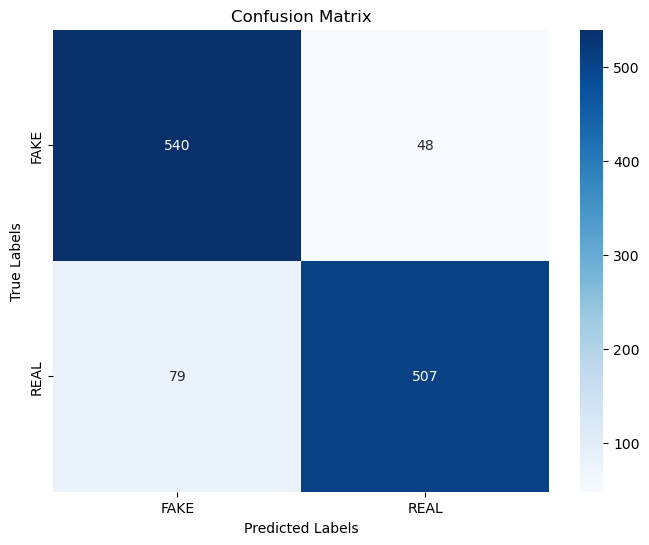

In [48]:
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(test_generator.labels, labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


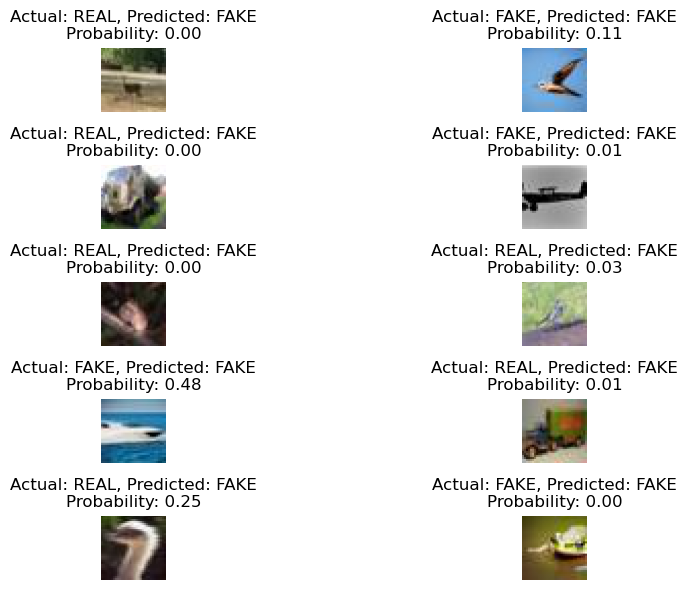

In [49]:
# Select random samples from the test data
sample_indices = np.random.choice(len(test_generator), size=10, replace=False)
sample_images = []
sample_actual_labels = []
sample_predicted_labels = []
sample_probabilities = []

for i in sample_indices:
    image, actual_labels = test_generator[i]
    predicted_label = labels[i]
    probability = predictions[i][0]
    sample_images.append(image[0])  # Access the first image in the batch
    sample_actual_labels.append(actual_labels[0])  # Access the actual label for the first image
    sample_predicted_labels.append(predicted_label)
    sample_probabilities.append(probability)

# Calculate the subplot layout based on the number of sample images
num_images = len(sample_images)
num_rows = int(np.ceil(num_images / 2))
num_cols = min(num_images, 2)

# Plot the sample images with labels and probabilities
plt.figure(figsize=(12, 6))
for i in range(len(sample_images)):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(sample_images[i])
    actual_label = "FAKE" if sample_actual_labels[i] == 0 else "REAL"
    predicted_label = "FAKE" if sample_predicted_labels[i] == 0 else "REAL"
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}\nProbability: {sample_probabilities[i]:.2f}")
    plt.axis('off')
plt.tight_layout()
plt.show()


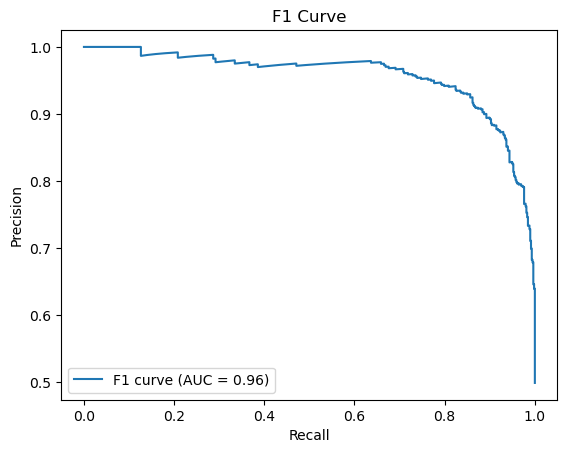

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(test_generator.labels, predictions)

# Calculate F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)

# Calculate area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot the F1 curve
plt.plot(recall, precision, label='F1 curve (AUC = {:.2f})'.format(auc_score))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('F1 Curve')
plt.legend()
plt.show()